In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt    # for min functions

### Get Data

In [2]:
data = pd.read_csv("ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Split X and Y

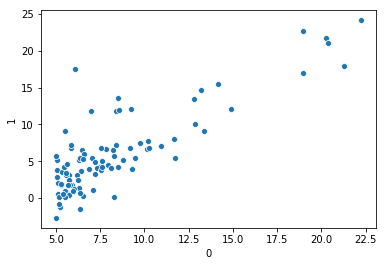

In [91]:
x=data[0]
y=data[1]
x.head()
sns.scatterplot(x, y)

In [98]:
m = x.shape[0]  # number of training examples
xarr = np.array(x).reshape(m, 1)
yarr = np.array(y).reshape(m, 1)

In [99]:
# the first column is 1's for the features 
ones = np.ones((m,1))
xarr = np.hstack((ones, xarr))

In case you are wondering, theta values are the slope and intercept values of the line equation. i.e the values of m and c in the equation y = c + mx. In this case yhat = theta[0][0]+ theta[0][1]*x

In [81]:
def computeCost(theta,x, y):
    y=y.reshape(-1,1)
    theta = theta.reshape(1,-1)
    Hyp = x.dot(theta.T)  # multiplying matrices
    diff = y - Hyp
    squared = np.square(diff)
    sumedUp = np.sum(squared)
    J = sumedUp / (2 * m)
    return J

In [82]:
# given - choose yourself
theta = np.array([[-1, 2]])
alpha = 0.0001
iters = 1000

print('Testing the cost function ...\n')
J = computeCost(theta, xarr, yarr)
J

Testing the cost function ...



54.24245508201238

In [83]:
def gradient(theta, X, y):
    return (1 / m) * ((X.T).dot((X.dot(theta) - y)))

In [100]:
initial_theta =  np.array([[2, 1]])
temp = opt.fmin_tnc(func=computeCost,
                    x0=initial_theta.flatten(),
                    fprime=gradient,
                    args=(xarr, yarr.flatten()))

# the output of above function is a tuple whose first element contains the optimized values of theta
theta_optimized = temp[0]
J = computeCost(theta_optimized, xarr, yarr)
print(theta_optimized)
print(J)

[-3.89578109  1.19303367]
4.476971375975184


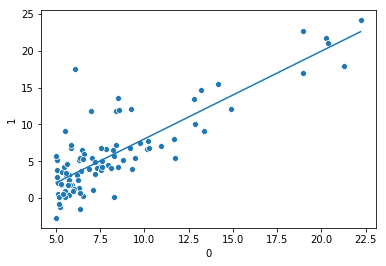

In [94]:
sns.scatterplot(x, y)
sns.lineplot(x, xarr.dot(theta_optimized))

# Polynomial

## Data generation

In [120]:
n = 100
domain = (-1, 1)

def sample(n, domain, add_noise=True):
    x = np.random.uniform(*domain, n) # sample x
    y = np.sin(2*np.pi*x) + np.random.normal(scale=0.1, size=n)*float(add_noise)
    return x, y

x2, y2 = sample(n, domain)

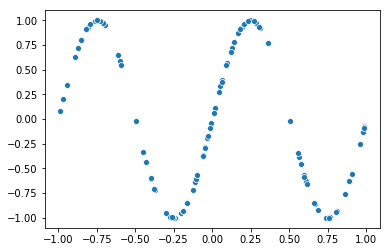

In [121]:
sns.scatterplot(x2, y2)

In [205]:
x2arr = x2.reshape(-1,1)
y2arr = y2.reshape(-1,1)
m = x2arr.shape[0]
ones = np.ones((m,1))
x2arr = np.hstack((ones, x2arr))
x2arr = np.hstack((ones, x2arr))
x2arr = np.hstack((ones, x2arr))
x2arr = np.hstack((ones, x2arr))
x2arr = np.hstack((ones, x2arr))
x2arr.shape


(100, 6)

(100, 6)
[ 0.04875052  0.13277801 -0.46888796  0.13277801  0.13277801 -0.45853928]
0.22607631256621677


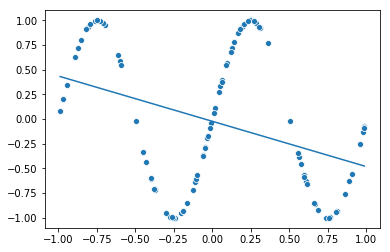

In [206]:
initial_theta =  np.array([[2, 1,3,1,1,1]])
temp = opt.fmin_tnc(func=computeCost,
                    x0=initial_theta.flatten(),
                    fprime=gradient,
                    args=(x2arr, y2arr.flatten()))
print(x2arr.shape)
# the output of above function is a tuple whose first element contains the optimized values of theta
theta_optimized = temp[0]
J = computeCost(theta_optimized, x2arr, y2arr)
print(theta_optimized)
print(J)
sns.scatterplot(x2, y2)
sns.lineplot(x2, x2arr.dot(theta_optimized))

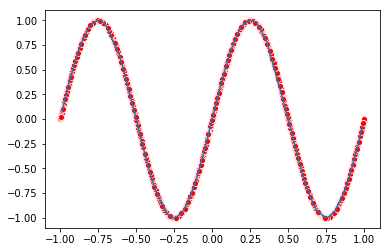

In [203]:
w = np.ones(3+1) # include bias
def poly(w,x,y):
    y = np.zeros(np.array(x).shape)
    y = y + w[0]
    for j in range(1,len(w)):
        y = y + w[j]*np.power(x, j)
    return y

def normal_equation(x_train, y_train, degree):
    phi = np.zeros(shape=(len(x_train), degree))
    for i in range(degree):
        phi[:, i] = x_train ** i

    y = np.array(y_train).reshape(-1, 1)
    return np.linalg.pinv(phi) @ y

# x, y = sample(n, domain)
# n_train = 5000
# n_val = 1000


# x_train, y_train = sample(n_train, domain)
# x_val, y_val = sample(n_val, domain)

# w_opt = normal_equation(x_train, y_train, 7)
w_opt = normal_equation (x2,y2,10) #choose the polynomial 

y = poly(w_opt, x2,y2)
sns.scatterplot(x_train, y_train, color='red')
sns.lineplot(x2, y.flatten())



